# 导包取数

In [1]:
import sys
import datetime
import dateutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery
from google_auth_oauthlib import flow
from google.oauth2.service_account import Credentials
import pandas_gbq as gbp
import json
import seaborn as sns

import scipy.stats as stats
import scipy.optimize as opt

pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt

In [2]:
#获取权限
# AbTest.auth()
out_df = None
config = {
    "installed": {
        "client_id": "331732725904-l8vvj4ud0grr3og2dfns85cfkdq9gajq.apps.googleusercontent.com",
        "project_id": "paint-by-number-3c789", "auth_uri": "https://accounts.google.com/o/oauth2/auth",
        "token_uri": "https://oauth2.googleapis.com/token",
        "auth_provider_x509_cert_url": "https://www.googleapis.com/oauth2/v1/certs",
        "client_secret": "Gr_NGbHFHUgbzZTDXHKAUYML",
        "redirect_uris": ["urn:ietf:wg:oauth:2.0:oob", "http://localhost"]
    }
}

app_flow = flow.InstalledAppFlow.from_client_config(
    config, scopes=[
        'https://www.googleapis.com/auth/bigquery'
    ]
)
app_flow.run_local_server()
credentials = app_flow.credentials
# 该project_id是firebase的项目id，如paint-by-number-3c789，请确保登录账号有该项目的权限
# project_id = 'paint-by-number-3c789'

project_id = 'foradmobapi'
# 该client只初始化一次，下面所有的sql都使用该client实例
client = bigquery.Client(project=project_id, credentials=credentials)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=331732725904-l8vvj4ud0grr3og2dfns85cfkdq9gajq.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=iWHawWip197lJPoW0WbfrgXEV25Zbo&access_type=offline


In [3]:
def gbp_query(query: str):
    df = client.query(query).to_dataframe()
    return df

# 读取campaign中间表数据

In [4]:
# campaign_review_android_median_table_di
project_id_list = ['paint-by-number-3c789',
'sudoku-a782f',
'blockpuzzle-f21e1']

## Qblock

In [11]:
qblock_sql_test = '''
SELECT 
    fea_x.create_date
    ,fea_x.first_country
    ,fea_x.campaign_name
    ,fea_x.ua_cost
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.r1users/fea_x.newusers ELSE 0 END AS retention1
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.r2users/fea_x.newusers ELSE 0 END AS retention2
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.r3users/fea_x.newusers ELSE 0 END AS retention3
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.rev0/fea_x.newusers ELSE 0 END AS arpu0
    ,CASE WHEN fea_x.r1users > 0 THEN fea_x.rev1/fea_x.r1users ELSE 0 END AS arpu1
    ,CASE WHEN fea_x.r2users > 0 THEN fea_x.rev2/fea_x.r2users ELSE 0 END AS arpu2
    ,CASE WHEN fea_x.r3users > 0 THEN fea_x.rev3/fea_x.r3users ELSE 0 END AS arpu3
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.duration_sec0/fea_x.newusers ELSE 0 END AS duration_sec0_pu
    ,CASE WHEN fea_x.r1users > 0 THEN fea_x.duration_sec1/fea_x.r1users ELSE 0 END AS duration_sec1_pu
    ,CASE WHEN fea_x.r2users > 0 THEN fea_x.duration_sec2/fea_x.r2users ELSE 0 END AS duration_sec2_pu
    ,CASE WHEN fea_x.r3users > 0 THEN fea_x.duration_sec3/fea_x.r3users ELSE 0 END AS duration_sec3_pu
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.crush_rows0/fea_x.newusers ELSE 0 END AS crush_rows0_pu
    ,CASE WHEN fea_x.r1users > 0 THEN fea_x.crush_rows1/fea_x.r1users ELSE 0 END AS crush_rows1_pu
    ,CASE WHEN fea_x.r2users > 0 THEN fea_x.crush_rows2/fea_x.r2users ELSE 0 END AS crush_rows2_pu
    ,CASE WHEN fea_x.r3users > 0 THEN fea_x.crush_rows3/fea_x.r3users ELSE 0 END AS crush_rows3_pu
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.crush_times0/fea_x.newusers ELSE 0 END AS crush_times0_pu
    ,CASE WHEN fea_x.r1users > 0 THEN fea_x.crush_times1/fea_x.r1users ELSE 0 END AS crush_times1_pu
    ,CASE WHEN fea_x.r2users > 0 THEN fea_x.crush_times2/fea_x.r2users ELSE 0 END AS crush_times2_pu
    ,CASE WHEN fea_x.r3users > 0 THEN fea_x.crush_times3/fea_x.r3users ELSE 0 END AS crush_times3_pu
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.combo_times0/fea_x.newusers ELSE 0 END AS combo_times0_pu
    ,CASE WHEN fea_x.r1users > 0 THEN fea_x.combo_times1/fea_x.r1users ELSE 0 END AS combo_times1_pu
    ,CASE WHEN fea_x.r2users > 0 THEN fea_x.combo_times2/fea_x.r2users ELSE 0 END AS combo_times2_pu
    ,CASE WHEN fea_x.r3users > 0 THEN fea_x.combo_times3/fea_x.r3users ELSE 0 END AS combo_times3_pu
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.game_num0/fea_x.newusers ELSE 0 END AS game_num0_pu
    ,CASE WHEN fea_x.r1users > 0 THEN fea_x.game_num1/fea_x.r1users ELSE 0 END AS game_num1_pu
    ,CASE WHEN fea_x.r2users > 0 THEN fea_x.game_num2/fea_x.r2users ELSE 0 END AS game_num2_pu
    ,CASE WHEN fea_x.r3users > 0 THEN fea_x.game_num3/fea_x.r3users ELSE 0 END AS game_num3_pu
    ,CASE WHEN fea_x.newusers > 0 THEN fea_x.best_record0/fea_x.newusers ELSE 0 END AS best_record0_pu
    ,CASE WHEN fea_x.r1users > 0 THEN fea_x.best_record1/fea_x.r1users ELSE 0 END AS best_record1_pu
    ,CASE WHEN fea_x.r2users > 0 THEN fea_x.best_record2/fea_x.r2users ELSE 0 END AS best_record2_pu
    ,CASE WHEN fea_x.r3users > 0 THEN fea_x.best_record3/fea_x.r3users ELSE 0 END AS best_record3_pu
    ,CASE WHEN fea_x.r1users > 0 THEN fea_x.round_num1/fea_x.r1users ELSE 0 END AS round_num1_pu
    ,CASE WHEN fea_x.r2users > 0 THEN fea_x.round_num2/fea_x.r2users ELSE 0 END AS round_num2_pu
    ,CASE WHEN fea_x.r3users > 0 THEN fea_x.round_num3/fea_x.r3users ELSE 0 END AS round_num3_pu
    ,CASE WHEN fea_x.r1users > 0 THEN fea_x.holder_out1/fea_x.r1users ELSE 0 END AS holder_out1_pu
    ,CASE WHEN fea_x.r2users > 0 THEN fea_x.holder_out2/fea_x.r2users ELSE 0 END AS holder_out2_pu
    ,CASE WHEN fea_x.r3users > 0 THEN fea_x.holder_out3/fea_x.r3users ELSE 0 END AS holder_out3_pu
    ,y.living_days
    ,y.sum_rev
    ,CASE WHEN fea_x.newusers > 0 THEN y.sum_rev/fea_x.newusers ELSE 0 END AS ltv
FROM
    (SELECT 
        create_date
        ,first_country
        ,campaign_name
        ,AVG(CASE WHEN living_days=0 THEN ua_cost else 0 END) ua_cost
        ,SUM(CASE WHEN living_days = 0 THEN retended ELSE 0 END) AS newusers 
        ,SUM(CASE WHEN living_days = 1 THEN retended ELSE 0 END) AS r1users 
        ,SUM(CASE WHEN living_days = 2 THEN retended ELSE 0 END) AS r2users 
        ,SUM(CASE WHEN living_days = 3 THEN retended ELSE 0 END) AS r3users 
        ,SUM(CASE WHEN living_days = 0 THEN rev ELSE 0 END) AS rev0 
        ,SUM(CASE WHEN living_days = 1 THEN rev ELSE 0 END) AS rev1 
        ,SUM(CASE WHEN living_days = 2 THEN rev ELSE 0 END) AS rev2 
        ,SUM(CASE WHEN living_days = 3 THEN rev ELSE 0 END) AS rev3 
        ,SUM(CASE WHEN living_days = 0 THEN duration_sec ELSE 0 END) AS duration_sec0 
        ,SUM(CASE WHEN living_days = 1 THEN duration_sec ELSE 0 END) AS duration_sec1 
        ,SUM(CASE WHEN living_days = 2 THEN duration_sec ELSE 0 END) AS duration_sec2 
        ,SUM(CASE WHEN living_days = 3 THEN duration_sec ELSE 0 END) AS duration_sec3 
        ,SUM(CASE WHEN living_days = 0 THEN crush_rows ELSE 0 END) AS crush_rows0 
        ,SUM(CASE WHEN living_days = 1 THEN crush_rows ELSE 0 END) AS crush_rows1 
        ,SUM(CASE WHEN living_days = 2 THEN crush_rows ELSE 0 END) AS crush_rows2 
        ,SUM(CASE WHEN living_days = 3 THEN crush_rows ELSE 0 END) AS crush_rows3 
        ,SUM(CASE WHEN living_days = 0 THEN crush_times ELSE 0 END) AS crush_times0 
        ,SUM(CASE WHEN living_days = 1 THEN crush_times ELSE 0 END) AS crush_times1 
        ,SUM(CASE WHEN living_days = 2 THEN crush_times ELSE 0 END) AS crush_times2 
        ,SUM(CASE WHEN living_days = 3 THEN crush_times ELSE 0 END) AS crush_times3 
        ,SUM(CASE WHEN living_days = 0 THEN combo_times ELSE 0 END) AS combo_times0 
        ,SUM(CASE WHEN living_days = 1 THEN combo_times ELSE 0 END) AS combo_times1 
        ,SUM(CASE WHEN living_days = 2 THEN combo_times ELSE 0 END) AS combo_times2 
        ,SUM(CASE WHEN living_days = 3 THEN combo_times ELSE 0 END) AS combo_times3 
        ,SUM(CASE WHEN living_days = 0 THEN game_num ELSE 0 END) AS game_num0 
        ,SUM(CASE WHEN living_days = 1 THEN game_num ELSE 0 END) AS game_num1 
        ,SUM(CASE WHEN living_days = 2 THEN game_num ELSE 0 END) AS game_num2 
        ,SUM(CASE WHEN living_days = 3 THEN game_num ELSE 0 END) AS game_num3 
        ,SUM(CASE WHEN living_days = 0 THEN best_record ELSE 0 END) AS best_record0 
        ,SUM(CASE WHEN living_days = 1 THEN best_record ELSE 0 END) AS best_record1 
        ,SUM(CASE WHEN living_days = 2 THEN best_record ELSE 0 END) AS best_record2 
        ,SUM(CASE WHEN living_days = 3 THEN best_record ELSE 0 END) AS best_record3 
        ,SUM(CASE WHEN living_days = 1 THEN round_num ELSE 0 END) AS round_num1 
        ,SUM(CASE WHEN living_days = 2 THEN round_num ELSE 0 END) AS round_num2 
        ,SUM(CASE WHEN living_days = 3 THEN round_num ELSE 0 END) AS round_num3 
        ,SUM(CASE WHEN living_days = 1 THEN holder_out ELSE 0 END) AS holder_out1 
        ,SUM(CASE WHEN living_days = 2 THEN holder_out ELSE 0 END) AS holder_out2 
        ,SUM(CASE WHEN living_days = 3 THEN holder_out ELSE 0 END) AS holder_out3 
    FROM 
        (SELECT  
            * 
        FROM `blockpuzzle-f21e1.warehouse.campaign_review_android_median_table_di`
        WHERE living_days BETWEEN 0 AND 3 
        AND first_country is not null
        AND ua_cost>0)
    GROUP BY 1,2,3) fea_x 
JOIN (
    SELECT 
        mix.create_date
        ,mix.campaign_name
        ,mix.first_country
        ,mix.living_days
        ,mix.sum_rev
    FROM
        (SELECT 
            *
            ,SUM(rev) over(partition by create_date,campaign_name,first_country 
                order by living_days ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as sum_rev
        FROM 
            (SELECT  
                create_date 
                ,campaign_name 
                ,first_country 
                ,living_days 
                ,rev
            FROM `blockpuzzle-f21e1.warehouse.campaign_review_android_median_table_di`
            WHERE first_country is not null)
        ORDER BY 1,2,3,4) mix 
    WHERE mix.living_days in (30,60,90,120)) y 
ON fea_x.create_date = y.create_date
AND fea_x.campaign_name = y.campaign_name
AND fea_x.first_country = y.first_country 
WHERE fea_x.newusers>=50
'''

In [12]:
qblock_test_data = gbp_query(qblock_sql_test)

In [13]:
qblock_test_data.head(1)

,create_date,first_country,campaign_name,ua_cost,retention1,retention2,retention3,arpu0,arpu1,arpu2,arpu3,duration_sec0_pu,duration_sec1_pu,duration_sec2_pu,duration_sec3_pu,crush_rows0_pu,crush_rows1_pu,crush_rows2_pu,crush_rows3_pu,crush_times0_pu,crush_times1_pu,crush_times2_pu,crush_times3_pu,combo_times0_pu,combo_times1_pu,combo_times2_pu,combo_times3_pu,game_num0_pu,game_num1_pu,game_num2_pu,game_num3_pu,best_record0_pu,best_record1_pu,best_record2_pu,best_record3_pu,round_num1_pu,round_num2_pu,round_num3_pu,holder_out1_pu,holder_out2_pu,holder_out3_pu,living_days,sum_rev,ltv
0,2020-09-02,South Africa,Qb_FB_adr_ZA_14times_0709,0.099875,0.537634,0.387097,0.365591,0.002473,0.0106,0.0,0.007647,1859.167194,2392.72842,2422.651083,2696.265412,113.311828,168.44,174.638889,202.735294,91.419355,136.12,136.472222,158.294118,4.451613,6.72,8.305556,10.029412,5.139785,6.62,10.027778,11.823529,849.032258,1009.74,1219.805556,1340.352941,183.54,195.416667,223.058824,8.68,11.083333,10.911765,30,7.0,0.037634


In [14]:
qblock_fea_x = qblock_test_data.columns[4:-2].tolist()
qblock_y = [qblock_test_data.columns[-1]]

In [15]:
qblock_test_data.columns

Index(['create_date', 'first_country', 'campaign_name', 'ua_cost',
       'retention1', 'retention2', 'retention3', 'arpu0', 'arpu1', 'arpu2',
       'arpu3', 'duration_sec0_pu', 'duration_sec1_pu', 'duration_sec2_pu',
       'duration_sec3_pu', 'crush_rows0_pu', 'crush_rows1_pu',
       'crush_rows2_pu', 'crush_rows3_pu', 'crush_times0_pu',
       'crush_times1_pu', 'crush_times2_pu', 'crush_times3_pu',
       'combo_times0_pu', 'combo_times1_pu', 'combo_times2_pu',
       'combo_times3_pu', 'game_num0_pu', 'game_num1_pu', 'game_num2_pu',
       'game_num3_pu', 'best_record0_pu', 'best_record1_pu', 'best_record2_pu',
       'best_record3_pu', 'round_num1_pu', 'round_num2_pu', 'round_num3_pu',
       'holder_out1_pu', 'holder_out2_pu', 'holder_out3_pu', 'living_days',
       'sum_rev', 'ltv'],
      dtype='object')

# 相关性分析

<AxesSubplot:>

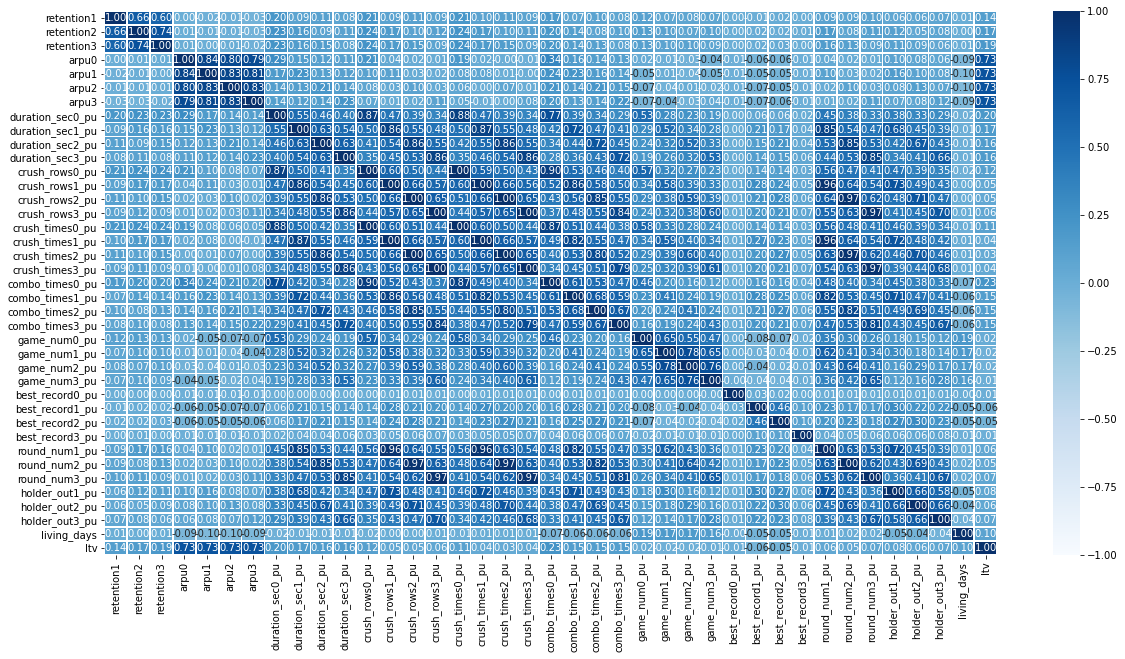

In [16]:
plt.subplots(figsize=(20, 10))
sns.heatmap(qblock_test_data[qblock_fea_x+qblock_y].corr(), annot=True, linewidths=.6, fmt='.2f', vmax=1, vmin=-1, center=0, cmap='Blues')

In [188]:
import seaborn as sns

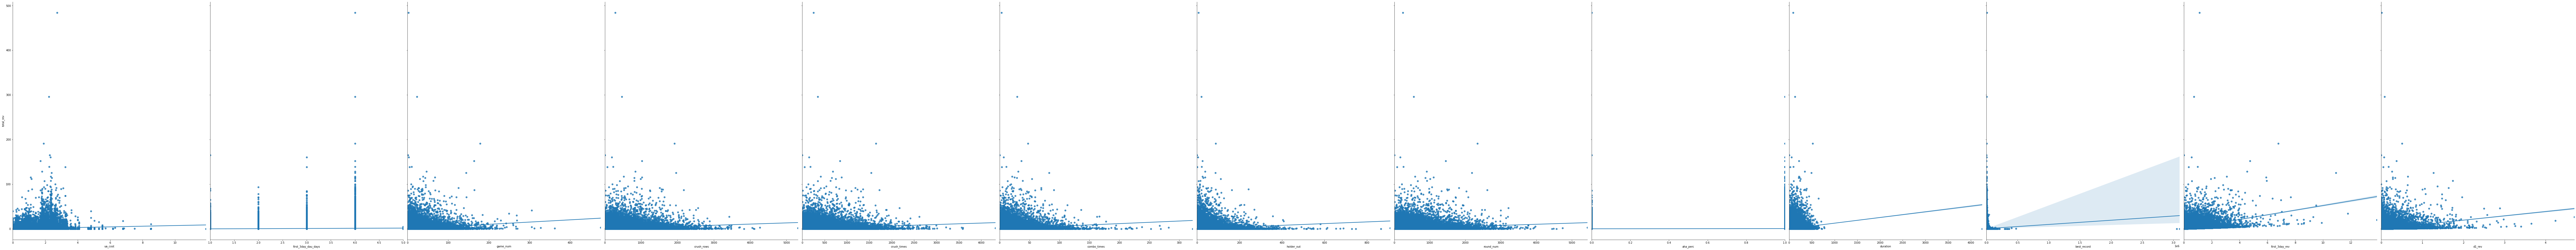

In [192]:
sns.pairplot(qblock_test_data, x_vars=qblock_fea_x, y_vars=qblock_y, height=13, aspect=0.8,kind = 'reg')
plt.savefig("after_pairplot.jpg")

<h1>回归模型</h1>

<h2>简单线性回归</h2>

<h3>数据标准化 & 离散数据连续化</h3>

In [17]:
from sklearn import preprocessing

In [18]:
qblock_fea_x.append('first_country_continous')
qblock_fea_x.append('ua_cost')

In [19]:
qblock_test_data["first_country_continous"] = pd.factorize(qblock_test_data["first_country"])[0].astype(np.uint16)

In [ ]:
qblock_test_data['create_date'] = pd.to_datetime(qblock_test_data['create_date'])
qblock_test_data['dayofweek'] = qblock_test_data['create_date'].dt.dayofweek

In [20]:
X_qb = qblock_test_data[qblock_fea_x]
y_qb = qblock_test_data[qblock_y]
X_qb = preprocessing.scale(X_qb)

In [21]:
qblock_fea_x

['retention1',
 'retention2',
 'retention3',
 'arpu0',
 'arpu1',
 'arpu2',
 'arpu3',
 'duration_sec0_pu',
 'duration_sec1_pu',
 'duration_sec2_pu',
 'duration_sec3_pu',
 'crush_rows0_pu',
 'crush_rows1_pu',
 'crush_rows2_pu',
 'crush_rows3_pu',
 'crush_times0_pu',
 'crush_times1_pu',
 'crush_times2_pu',
 'crush_times3_pu',
 'combo_times0_pu',
 'combo_times1_pu',
 'combo_times2_pu',
 'combo_times3_pu',
 'game_num0_pu',
 'game_num1_pu',
 'game_num2_pu',
 'game_num3_pu',
 'best_record0_pu',
 'best_record1_pu',
 'best_record2_pu',
 'best_record3_pu',
 'round_num1_pu',
 'round_num2_pu',
 'round_num3_pu',
 'holder_out1_pu',
 'holder_out2_pu',
 'holder_out3_pu',
 'living_days',
 'first_country_continous',
 'ua_cost']

<h3>Learning Curve</h3>

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

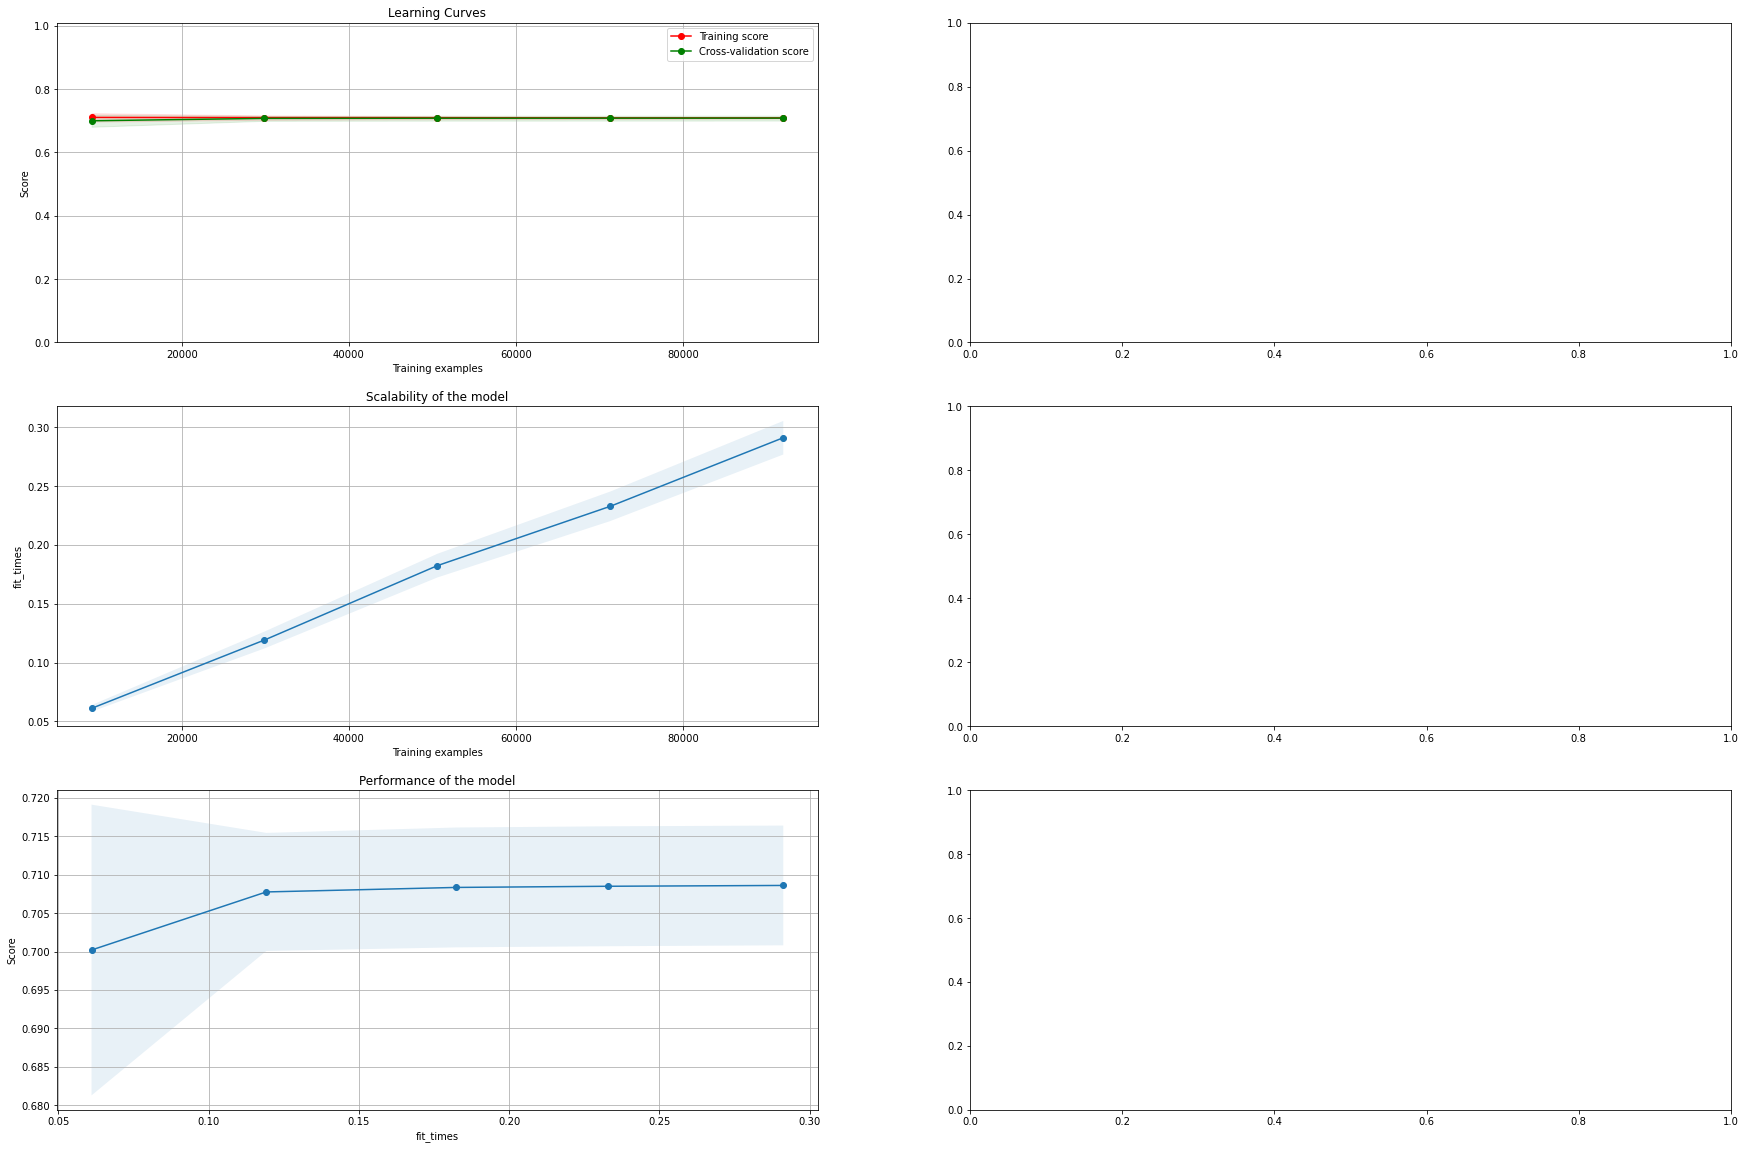

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(30, 20))
title = "Learning Curves"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, X_qb, y_qb, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

In [25]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X_qb, y_qb, cv=cv, n_jobs=None,
                       train_sizes=np.linspace(.1, 1.0, 5),
                       return_times=True)

In [26]:
np.mean(train_scores, axis=1)

array([0.71085795, 0.71016262, 0.70984034, 0.70941823, 0.70923564])

In [27]:
np.mean(test_scores, axis=1)

array([0.70019928, 0.70775103, 0.70833815, 0.70848946, 0.70859606])

<h2>Polynomial Regression</h2>

<h3>多项式参数处理</h3>

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(3)
poly3_X_qb = poly.fit_transform(X_qb)

In [19]:
print('The feature number is:', len(poly3_X_qb[0]))

The feature number is: 6545


<h3>三次回归结果验证</h3>

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(30, 20))
title = "Learning Curves"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, poly3_X_qb, y_qb, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4)
plt.show()

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, poly3_X_qb, y_qb, cv=cv, n_jobs=None,
                       train_sizes=np.linspace(.1, 1.0, 5),
                       return_times=True)

In [ ]:
np.mean(train_scores, axis=1)

In [ ]:
np.mean(test_scores, axis=1)

In [37]:
qblock_test_data.head(10)

,create_date,first_country,campaign_name,ua_cost,retention1,retention2,retention3,arpu0,arpu1,arpu2,arpu3,duration_sec0_pu,duration_sec1_pu,duration_sec2_pu,duration_sec3_pu,crush_rows0_pu,crush_rows1_pu,crush_rows2_pu,crush_rows3_pu,crush_times0_pu,crush_times1_pu,crush_times2_pu,crush_times3_pu,combo_times0_pu,combo_times1_pu,combo_times2_pu,combo_times3_pu,game_num0_pu,game_num1_pu,game_num2_pu,game_num3_pu,best_record0_pu,best_record1_pu,best_record2_pu,best_record3_pu,living_days,sum_rev,ltv,first_country_continous
0,2020-09-01,Spain,Qb_FB_adr_ES_img_0819,0.529123,0.517241,0.293103,0.206897,0.007069,0.021000,0.022353,0.000,1893.536672,3576.058633,3381.388529,3909.474917,111.000000,183.800000,235.294118,258.416667,90.362069,147.366667,187.411765,213.833333,4.017241,7.733333,9.705882,7.916667,4.672414,6.966667,7.647059,12.00,630.413793,1116.333333,1416.941176,1350.00,30,4.46,0.076897,0
1,2020-09-01,Spain,Qb_FB_adr_ES_img_0819,0.529123,0.517241,0.293103,0.206897,0.007069,0.021000,0.022353,0.000,1893.536672,3576.058633,3381.388529,3909.474917,111.000000,183.800000,235.294118,258.416667,90.362069,147.366667,187.411765,213.833333,4.017241,7.733333,9.705882,7.916667,4.672414,6.966667,7.647059,12.00,630.413793,1116.333333,1416.941176,1350.00,60,7.13,0.122931,0
2,2020-09-01,Spain,Qb_FB_adr_ES_img_0819,0.529123,0.517241,0.293103,0.206897,0.007069,0.021000,0.022353,0.000,1893.536672,3576.058633,3381.388529,3909.474917,111.000000,183.800000,235.294118,258.416667,90.362069,147.366667,187.411765,213.833333,4.017241,7.733333,9.705882,7.916667,4.672414,6.966667,7.647059,12.00,630.413793,1116.333333,1416.941176,1350.00,90,10.05,0.173276,0
3,2020-09-01,Spain,Qb_FB_adr_ES_img_0819,0.529123,0.517241,0.293103,0.206897,0.007069,0.021000,0.022353,0.000,1893.536672,3576.058633,3381.388529,3909.474917,111.000000,183.800000,235.294118,258.416667,90.362069,147.366667,187.411765,213.833333,4.017241,7.733333,9.705882,7.916667,4.672414,6.966667,7.647059,12.00,630.413793,1116.333333,1416.941176,1350.00,120,11.39,0.196379,0
4,2020-09-01,Mexico,Qb_FB_adr_MX_eliBoxBQ_CPA_0810,0.132429,0.447761,0.358209,0.298507,0.002985,0.011667,0.016250,0.000,2241.330687,3896.206633,3692.217292,4262.563800,161.119403,244.633333,268.041667,265.450000,134.104478,200.800000,221.375000,211.550000,4.940299,8.033333,8.708333,10.950000,5.686567,7.433333,7.125000,6.55,893.850746,1439.900000,1969.000000,2255.05,30,5.55,0.082836,1
5,2020-09-01,Mexico,Qb_FB_adr_MX_eliBoxBQ_CPA_0810,0.132429,0.447761,0.358209,0.298507,0.002985,0.011667,0.016250,0.000,2241.330687,3896.206633,3692.217292,4262.563800,161.119403,244.633333,268.041667,265.450000,134.104478,200.800000,221.375000,211.550000,4.940299,8.033333,8.708333,10.950000,5.686567,7.433333,7.125000,6.55,893.850746,1439.900000,1969.000000,2255.05,60,8.32,0.124179,1
6,2020-09-01,Mexico,Qb_FB_adr_MX_eliBoxBQ_CPA_0810,0.132429,0.447761,0.358209,0.298507,0.002985,0.011667,0.016250,0.000,2241.330687,3896.206633,3692.217292,4262.563800,161.119403,244.633333,268.041667,265.450000,134.104478,200.800000,221.375000,211.550000,4.940299,8.033333,8.708333,10.950000,5.686567,7.433333,7.125000,6.55,893.850746,1439.900000,1969.000000,2255.05,90,10.95,0.163433,1
7,2020-09-01,Mexico,Qb_FB_adr_MX_eliBoxBQ_CPA_0810,0.132429,0.447761,0.358209,0.298507,0.002985,0.011667,0.016250,0.000,2241.330687,3896.206633,3692.217292,4262.563800,161.119403,244.633333,268.041667,265.450000,134.104478,200.800000,221.375000,211.550000,4.940299,8.033333,8.708333,10.950000,5.686567,7.433333,7.125000,6.55,893.850746,1439.900000,1969.000000,2255.05,120,11.90,0.177612,1
8,2020-09-02,Russia,RU_2.5_Holder115_AerisEliminate_0611,0.000000,0.111111,0.222222,0.222222,0.001111,0.000000,0.000000,0.005,657.830667,1218.307000,741.922000,4772.248000,92.777778,47.000000,269.000000,324.500000,77.333333,42.000000,233.500000,251.500000,3.333333,0.000000,5.500000,16.000000,1.444444,1.000000,2.500000,6.00,2106.888889,20769.000000,2394.500000,4371.00,30,0.49,0.054444,2
9,2020-09-02,Russia,RU_2.5_